In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")
from glob import glob

In [3]:
#Mounting Google Drive to be used in Colab
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
#Setting the root directory
root_path = '/content/gdrive/MyDrive/Assignment_Data/CNN_assignment'

In [5]:
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [6]:
train_image_count = len(list(data_dir_train.glob('*/*.jpg')))
test_image_count = len(list(data_dir_test.glob('*/*.jpg')))
print(train_image_count)
print(test_image_count)

2239
118


In [7]:
#Loading the image in the dataset and setting the parameters as per the assignment instructions

batch_size = 32
image_height = 180
image_width = 180

In [8]:
#Using 80% data for train
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=100,
  validation_split=0.2,
  subset="training",
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
#Using 20% data for validation
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=100,
  validation_split=0.2,
  subset="validation",
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
#Checking all the classes present in the dataset
class_names = train_data.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


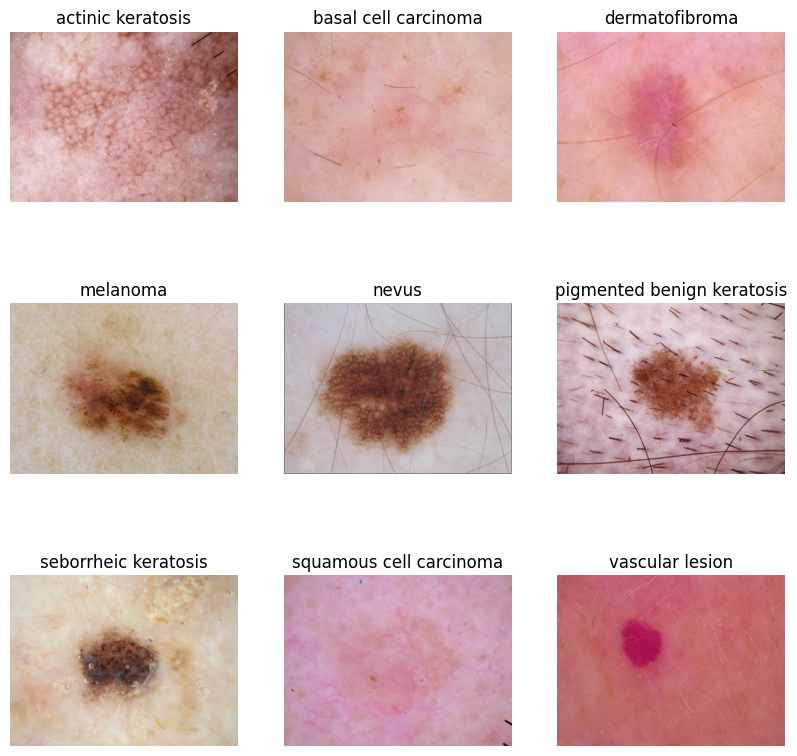

In [11]:
#Visualizing the data
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  image = plt.imread(
      str(list(data_dir_train.glob(f'{class_names[i]}/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis('off')

Set of images are tesnors of the sahpe (32,180,180,3)-> 32 is batch size and 180 is height and width where as 3 is channels (RGB)

**Creating Model**
- Creating CNN Model to detect 9 classes.
RGB Channel values are (0,255), standardizing them to (0,1)

In [12]:
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(image_height, image_width,3)))
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size=(7, 7),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(11,11),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [13]:
### Compiling the model by choosing appropirate optimiser and loss function

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
# summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

In [15]:
#Training the model with 20 epochs

epochs = 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/20
56/56 [==============================] - 391s 6s/step - loss: 2.0584 - accuracy: 0.1763 - val_loss: 2.0862 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 2/20
56/56 [==============================] - 17s 276ms/step - loss: 2.0383 - accuracy: 0.2015 - val_loss: 2.0197 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 3/20
56/56 [==============================] - 17s 275ms/step - loss: 2.0312 - accuracy: 0.1953 - val_loss: 2.0071 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 4/20
56/56 [==============================] - 18s 287ms/step - loss: 2.0267 - accuracy: 0.1948 - val_loss: 2.0103 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 5/20
56/56 [==============================] - 17s 281ms/step - loss: 2.0200 - accuracy: 0.1998 - val_loss: 2.0226 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 6/20
56/56 [==============================] - ETA: 0s - loss: 2.0266 - accuracy: 0.1953
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
56/56 [==============================] - 17s 276ms/

**Plotting training results**

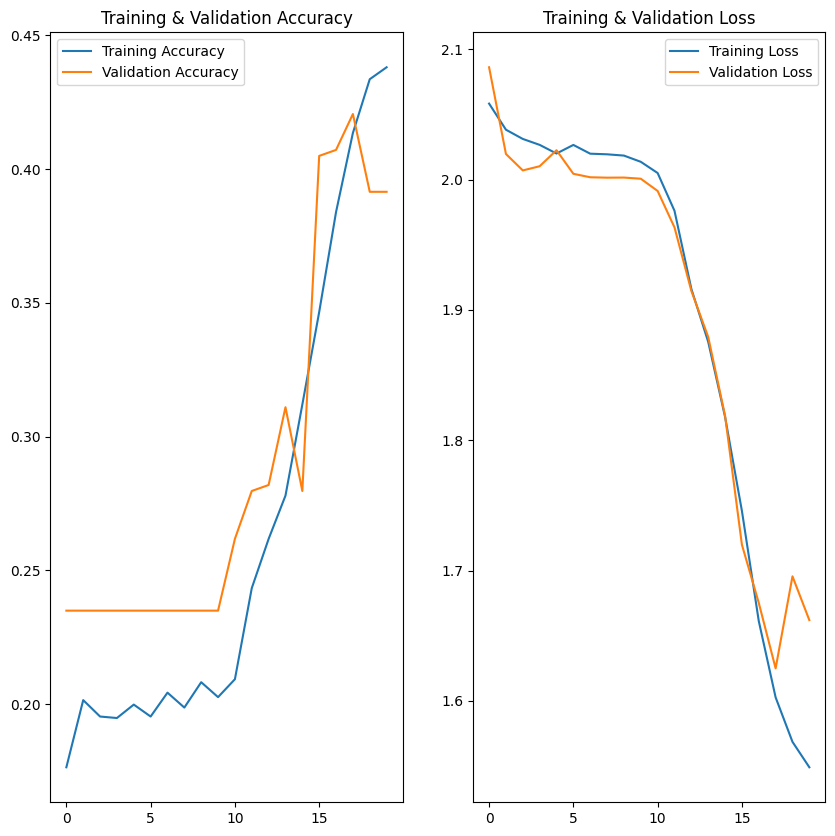

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()

Findings

- There is not much difference between training and validation accuracy, but both are very low indicating under fitting
- training and validation losses are low but not stable
- Based on above 2 observations we can say model is not a good model

Based on the analysis of above model, choosing right augmentation startegy to correct the model

In [17]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                 input_shape=(image_height,
                                                              image_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.1)
  ]
)

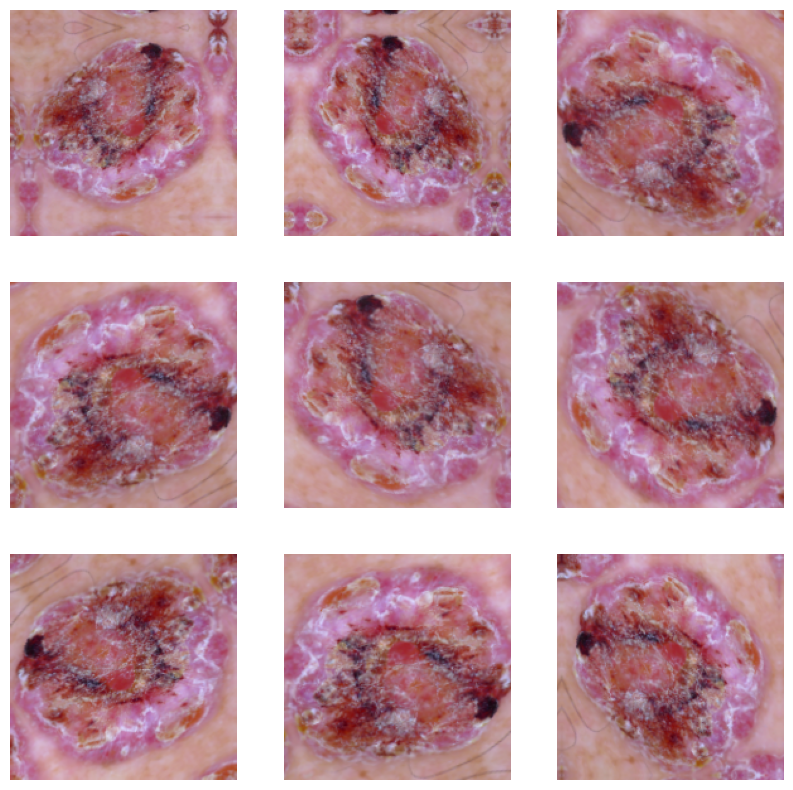

In [18]:
#Visualizing a image after applying the augmentation startegy
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [19]:
#Creating, compiling and training the model
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width,3)))
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3, 3),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size=(7, 7),padding = 'Same',activation= 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(11, 11),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, kernel_size=(3, 3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [20]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 90, 90, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

In [22]:
epochs = 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/20
56/56 [==============================] - 21s 277ms/step - loss: 2.0690 - accuracy: 0.1842 - val_loss: 2.0573 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 2/20
56/56 [==============================] - 17s 280ms/step - loss: 2.0288 - accuracy: 0.1903 - val_loss: 2.0263 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 3/20
56/56 [==============================] - 19s 296ms/step - loss: 2.0061 - accuracy: 0.2093 - val_loss: 1.9642 - val_accuracy: 0.2595 - lr: 0.0010
Epoch 4/20
56/56 [==============================] - 17s 274ms/step - loss: 1.8800 - accuracy: 0.2740 - val_loss: 1.8407 - val_accuracy: 0.2975 - lr: 0.0010
Epoch 5/20
56/56 [==============================] - 17s 275ms/step - loss: 1.7957 - accuracy: 0.2963 - val_loss: 1.7481 - val_accuracy: 0.3490 - lr: 0.0010
Epoch 6/20
56/56 [==============================] - 17s 272ms/step - loss: 1.7156 - accuracy: 0.3387 - val_loss: 1.7551 - val_accuracy: 0.3356 - lr: 0.0010
Epoch 7/20
56/56 [==============================] - 19s 303ms/st

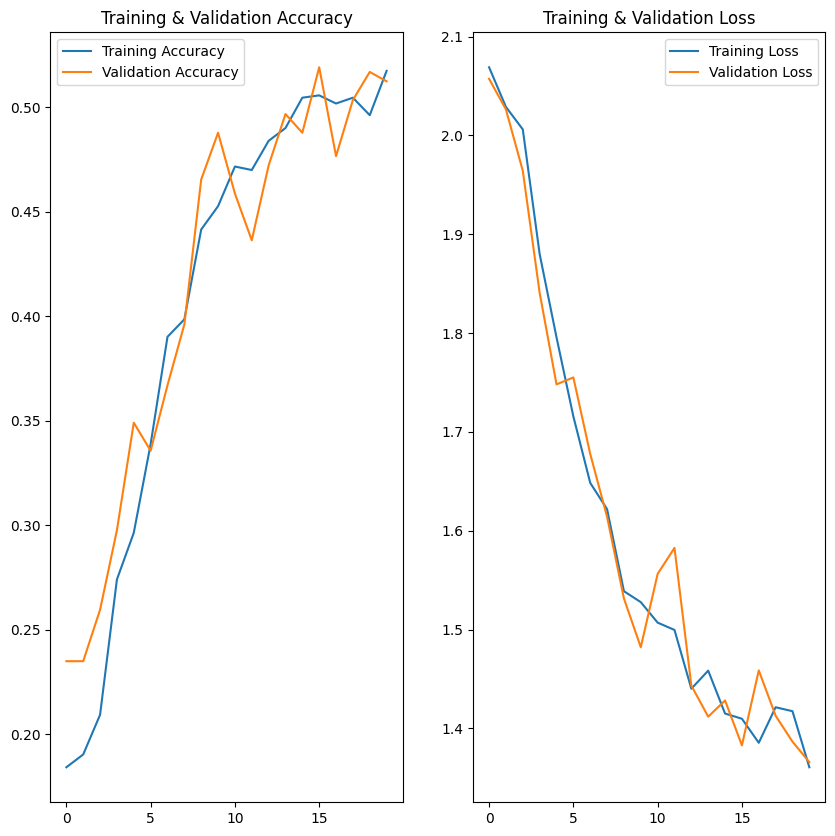

In [23]:
#Visualizing the above result

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training & Validation Loss')
plt.show()

**Observations**
- Training and validation accuracy are almost same, indicating good fit but the accuracy is very low (approximately equal to 51%)
- We may have to increase the number of epoch and see if handling class imbalance improves accuracy

In [24]:
#Finding the distribution of the classes
class_df=pd.DataFrame()
for i in range(len(class_names)):
  name= class_names[i]
  number = len(list(data_dir_train.glob(f'{class_names[i]}/*.jpg')))
  class_df=class_df.append({'class':name,'image_count':number},ignore_index=True)

In [25]:
class_df

,class,image_count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<function matplotlib.pyplot.show(close=None, block=None)>

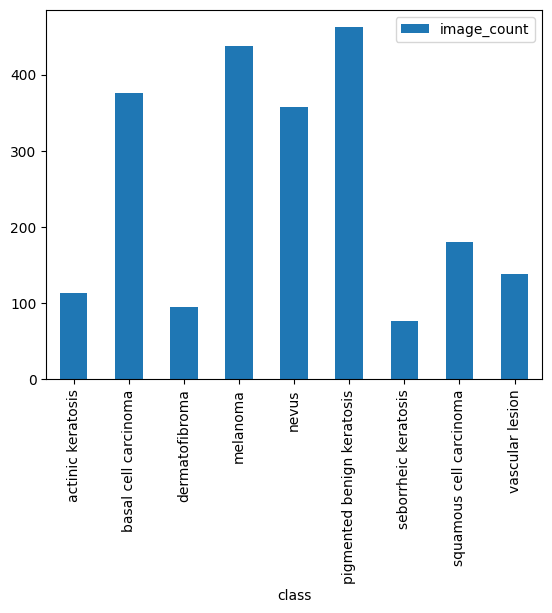

In [26]:
#Plotting the above result
class_df.plot.bar(x='class',y='image_count')
plt.show

**Questions and Answesr based on above plot**
- 1) Which class has the least number of samples?
-> seborrheic keratosis (77)
- 2) Which classes dominate the data in terms of the proportionate number of samples?
->pigmented benign keratosis (462)

**Rectify the class imbalance**

In [27]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

- Instantiate a Pipeline object pointing to a directory containing your initial image data set.
- Define a number of operations to perform on this data set using your Pipeline object.
- Execute these operations by calling the Pipeline’s sample() method.

In [28]:
class_names=['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']

In [29]:
path_to_training_dataset=root_path + '/Train/'
#path_to_training_dataset='/content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E2DA022AE90>: 100%|██████████| 500/500 [00:22<00:00, 22.71 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E2DA022B490>: 100%|██████████| 500/500 [00:20<00:00, 24.57 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E2DA0B563E0>: 100%|██████████| 500/500 [00:17<00:00, 28.08 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7E2DA111BF10>: 100%|██████████| 500/500 [01:22<00:00,  6.09 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=962x671 at 0x7E2DA02BD960>: 100%|██████████| 500/500 [01:21<00:00,  6.15 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E2DC42EFBE0>: 100%|██████████| 500/500 [00:17<00:00, 29.30 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E2DA10E8EE0>: 100%|██████████| 500/500 [00:38<00:00, 12.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E2DC40B9C90>: 100%|██████████| 500/500 [00:17<00:00, 28.63 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E2DA01AA1D0>: 100%|██████████| 500/500 [00:17<00:00, 29.26 Samples/s]


Augmente images are stored in the subdirectory output for each class of the cancer.

In [30]:
#Checking total images after the above step
train_image_count = len(list(data_dir_train.glob('*/output/*.jpg')))
print(train_image_count)

4500


In [31]:
class_df2=pd.DataFrame()
for i in range(len(class_names)):
  name= class_names[i]
  number = len(list(data_dir_train.glob(f'{class_names[i]}/output/*.jpg')))
  class_df2=class_df2.append({'class':name,'image_count':number},ignore_index=True)

In [32]:
class_df2

,class,image_count
0,actinic keratosis,500
1,basal cell carcinoma,500
2,dermatofibroma,500
3,melanoma,500
4,nevus,500
5,pigmented benign keratosis,500
6,seborrheic keratosis,500
7,squamous cell carcinoma,500
8,vascular lesion,500


<function matplotlib.pyplot.show(close=None, block=None)>

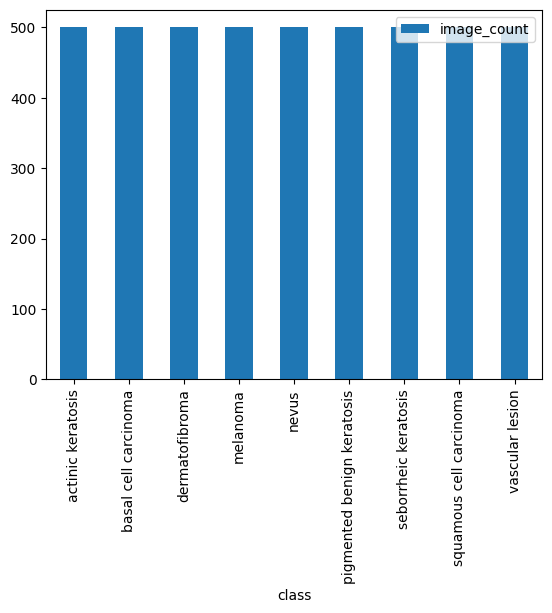

In [33]:
#Distribtion of images after adding augmented images
class_df2.plot.bar(x='class',y='image_count')
plt.show

In [34]:
train_data_new = list(glob(os.path.join(data_dir_train, '*','output', '*.jpg')))
train_data_new

['/content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029973.jpg_3fcd2e2f-0c23-4e6c-80bd-7ae357e83311.jpg',
 '/content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029248.jpg_6ad920fe-6a65-4b6d-91e7-a3be25a4c3b3.jpg',
 '/content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033808.jpg_e555ce6d-f57c-49b3-b442-40492cec9a58.jpg',
 '/content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0033695.jpg_917b8512-7bf8-45b8-a4d9-942c1f7cb799.jpg',
 '/content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0029824.jpg_e5606b60-8792-4424-a7cb-2eaa9bbee467.jpg',
 '/content/gdrive/MyDrive/Assignment_Data/CNN_assignment/Train/dermatofibroma/output/dermatofibroma_original_ISIC_0025668.jpg_c472719d-5a5a-4aa9-86cc-af433

In [35]:
class_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [36]:
class_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [37]:
dict_datframe = dict(zip(train_data_new, class_list_new))

In [38]:
for i in class_names:
    directory =root_path + '/Train'
    directory_out =root_path + '/Train'+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    count=len(list(class_directory.glob(i+'/*.jpg')))
    count_out=len(list(class_directory_out.glob('*.jpg')))
    total_count=count+count_out
    print(f'{i} -> {total_count} images.')

actinic keratosis -> 614 images.
basal cell carcinoma -> 876 images.
dermatofibroma -> 595 images.
melanoma -> 938 images.
nevus -> 857 images.
pigmented benign keratosis -> 962 images.
seborrheic keratosis -> 577 images.
squamous cell carcinoma -> 681 images.
vascular lesion -> 639 images.


Above result shows we have added 500 images in each class


Based on above data set we will repeat the process of training the model

In [39]:
#Creating training data set
data_dir_train=root_path+'/Train'
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=100,
  validation_split = 0.2,
  subset = "training",
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [40]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [41]:
#Creating Model
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names),activation='softmax'))

In [42]:
#Compiling
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 41, 41, 128)      

In [44]:
#Training the model
epochs = 50
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
              callbacks=[learn_control]
)

Epoch 1/50
169/169 [==============================] - 45s 231ms/step - loss: 2.0603 - accuracy: 0.1860 - val_loss: 1.8440 - val_accuracy: 0.2428 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 35s 198ms/step - loss: 1.9260 - accuracy: 0.2400 - val_loss: 2.4137 - val_accuracy: 0.1255 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 36s 206ms/step - loss: 1.7987 - accuracy: 0.2928 - val_loss: 1.5632 - val_accuracy: 0.3794 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 35s 199ms/step - loss: 1.6427 - accuracy: 0.3635 - val_loss: 1.5292 - val_accuracy: 0.3920 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 36s 203ms/step - loss: 1.5338 - accuracy: 0.4050 - val_loss: 1.4904 - val_accuracy: 0.4053 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 35s 199ms/step - loss: 1.4932 - accuracy: 0.4188 - val_loss: 1.3500 - val_accuracy: 0.4781 - lr: 0.0010
Epoch 7/50
169/169 [==============================] 

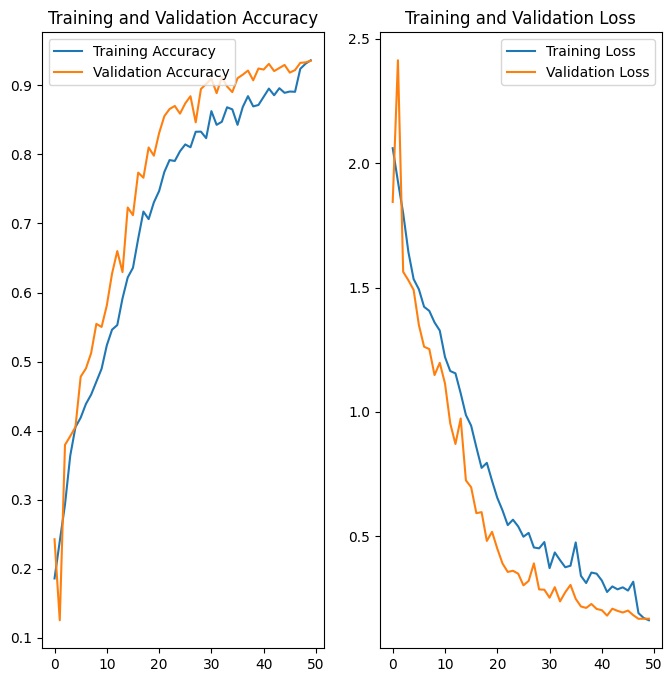

In [45]:
##Plotting the results
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observations**
- Training and validation accuracy are above 93% , that indicates good fit
- We can see by handling class imbalance accuracy has improved quite significantly
-Model is able to classify images with above 93% accuracy